# Assignment: Bagging (with Decision Tree as the Base Classifier) on IRIS dataset

In this assignment, we will first learn how to use Bagging algorithms. You have already used Decision Tree Classifers. In this problem you will work on how to apply Bagging Algorithms with Decision Tree Classifiers being the base Classifier.

You will first fit the data to a single Decision Tree. Then you will fir the data to a Bagging Classifier with Decision Tree as the Base Classifier. Remember Bagging algorithm is an ensemble method and hence utilizes a group of classifiers to arrive at the decision.

You should be able to compare the results of classification with a single Decision Tree vs Bagging with Decision Tree Base classifier (which means  that the Bagging Algorithm can technically use (say) 10 Decision Tree Classifiers)

Plot the decision boundaries using a single Decision Tree vs the Bagging Classifier.

Please note that technically you could have used any classifier as the Base classifier e.g. KNN would be another possible classifier.

## Bagging : sklearn

Go to https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html. The page contains nice description of Bagging.

In [1]:
# Import necessary Packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
# write code to import the Decision Tree Classifier here
from sklearn.tree import DecisionTreeClassifier
# the following line imports the bagging classifier from sklearn
from sklearn.ensemble import BaggingClassifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.1.


In [2]:
#Load iris data
iris = load_iris()


# check what are the features
print("Iris data Feature Names : ", iris.feature_names)

# print the detailed description 
print(iris.DESCR)

# load the data and target
X = iris.data[:, :2]
y = iris.target

Iris data Feature Names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    pe

## Train-Test Split
1.Create a train test split with test size as 20% of the entire dataset

## Train a single Decision Tree Classifier

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# In KNN method we do not have any actual model.
# So fitting the training data to KNN means that the KNN algorithm will remember the entire dataset
# as the training data

# write code here to fit the training data to a single Decision Tree Classifier instead
clf_decsntree = DecisionTreeClassifier()
clf_decsntree.fit(X_train, y_train)


# modify code to predict the label of the test data
predicted = clf_decsntree.predict(X_test)

**Question 1** a) Write a code to to print accuracy of the Decision Tree Classifer.

In [4]:
# Answer for question 1 : 
# write your code here
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy of the with a single Decision Tree Classifier is {accuracy}")

Accuracy of the with a single Decision Tree Classifier is 0.6333333333333333


## Train a Bagging Classifier with Decision Tree as the Base Classifier

In [5]:
# write/modify code here to fit the training data to the Bagging Classifier
# please read about the Bagging Classifier to understand what can be the Base Classifiers.
# this particular problem requires you to choose Decision Tree Classifier as the Base Classifier
clf_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=0)
clf_bagging.fit(X_train, y_train)
predicted = clf_bagging.predict(X_test)


# modify code to predict the label of the test data

**Question 1** b) Write a code to to print accuracy of the Bagging Classifier.

In [6]:
# Answer for question 1 : 
# write your code here
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy of the Bagging algorithm with Decision Tree as Base Classifier is {accuracy}")


Accuracy of the Bagging algorithm with Decision Tree as Base Classifier is 0.7666666666666667


## Compare the performance of a single Decision Tree Classifier with the Bagging Classifier

**Question 2.a**). Draw the decision boundaries for a single Decision Tree classifier

In [7]:
# write you code here

# you can use the following plotting functions
 
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [8]:
X0, X1 = iris.data[:,0], iris.data[:, 1]
 
# Pass the data. make_meshgrid will automatically identify the min and max points to draw the grid
xx, yy = make_meshgrid(X0, X1)


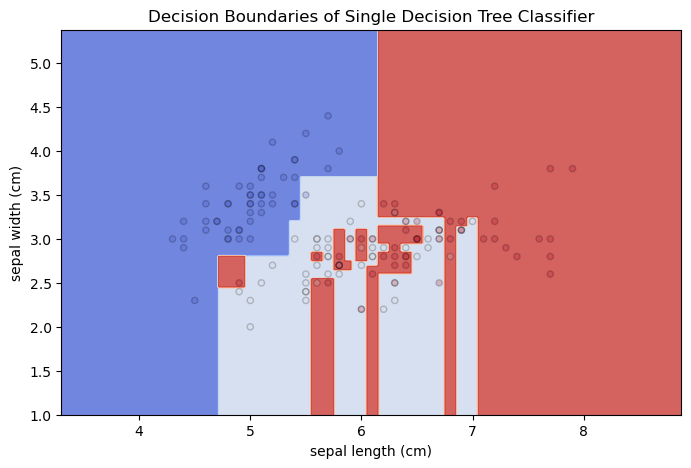

In [9]:
plt.figure(figsize=(8, 5))
plot_contours(plt, clf_decsntree, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=iris.target, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.2)
plt.title("Decision Boundaries of Single Decision Tree Classifier")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

**Question 2.b**. Draw the decision boundaries for a Bagging classifier

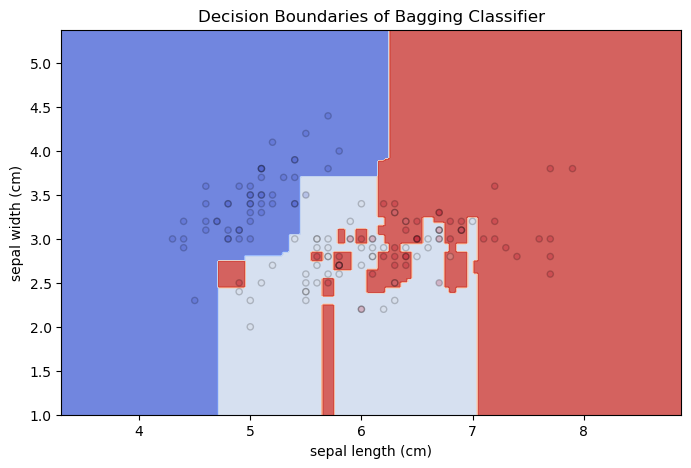

In [10]:
plt.figure(figsize=(8, 5))
plot_contours(plt, clf_bagging, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=iris.target, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.2)
plt.title("Decision Boundaries of Bagging Classifier")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()